# Expense Tracking Machine Learning Project

This project implements an expense tracking system using machine learning to categorize transactions and visualize spending patterns. It includes:
- Loading expense data from a provided CSV file
- Training a RandomForest model for expense categorization
- Creating visualizations (pie chart for categories, bar chart for monthly trends)

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

## Load Data

Load the expense data from the provided `expenses.csv` file and display the first few rows.

In [11]:
# Load data
df = pd.read_csv('expenses.csv')
df['date'] = pd.to_datetime(df['date'])

# Display first few rows
df.head(1000)

,transaction_id,date,description,amount,category
0,24917b06-820f-4006-989b-f6513b55f62d,2024-04-12,Electricity purchase 0,79.18,Transport
1,ced8b350-2ecf-460f-a612-e93338974b56,2024-12-14,Clothes purchase 1,111.96,Bills
2,f0766303-3f65-4080-8271-2ec2c82198ff,2024-09-27,Movie purchase 2,121.31,Entertainment
3,31611e86-293c-4276-8757-7f6d791af0c9,2024-04-16,Movie purchase 3,111.41,Food
4,dccc773e-5471-4d64-b221-11a68f862f50,2024-03-12,Coffee purchase 4,91.66,Entertainment
...,...,...,...,...,...
995,5f018bb0-0fa0-4f95-86b9-997368bf124b,2024-05-21,Clothes purchase 995,194.07,Entertainment
996,343b02a9-e5c7-4dc3-8458-21bc5cf1c6fe,2024-11-15,Coffee purchase 996,190.08,Transport
997,305462f5-eb2b-481b-999c-2a40b0c6a771,2024-02-07,Electricity purchase 997,105.02,Bills
998,5efe9425-80e7-4f2f-9485-3a6f096e7bbd,2024-10-19,Bus purchase 998,23.27,Food


## Train Expense Categorization Model

Use a RandomForestClassifier with TF-IDF vectorization to categorize expenses based on their descriptions.

In [12]:
def train_expense_categorizer(df):
    X = df['description']
    y = df['category']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=1000)),
        ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Evaluate
    accuracy = pipeline.score(X_test, y_test)
    print(f"Model accuracy: {accuracy:.2f}")
    
    return pipeline

# Train the model
model = train_expense_categorizer(df)

Model accuracy: 0.17


## Create Visualizations

Generate two visualizations:
1. Pie chart showing expense distribution by category
2. Bar chart showing monthly spending trends

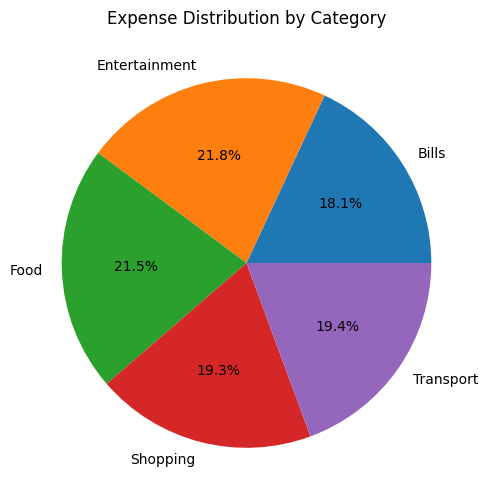

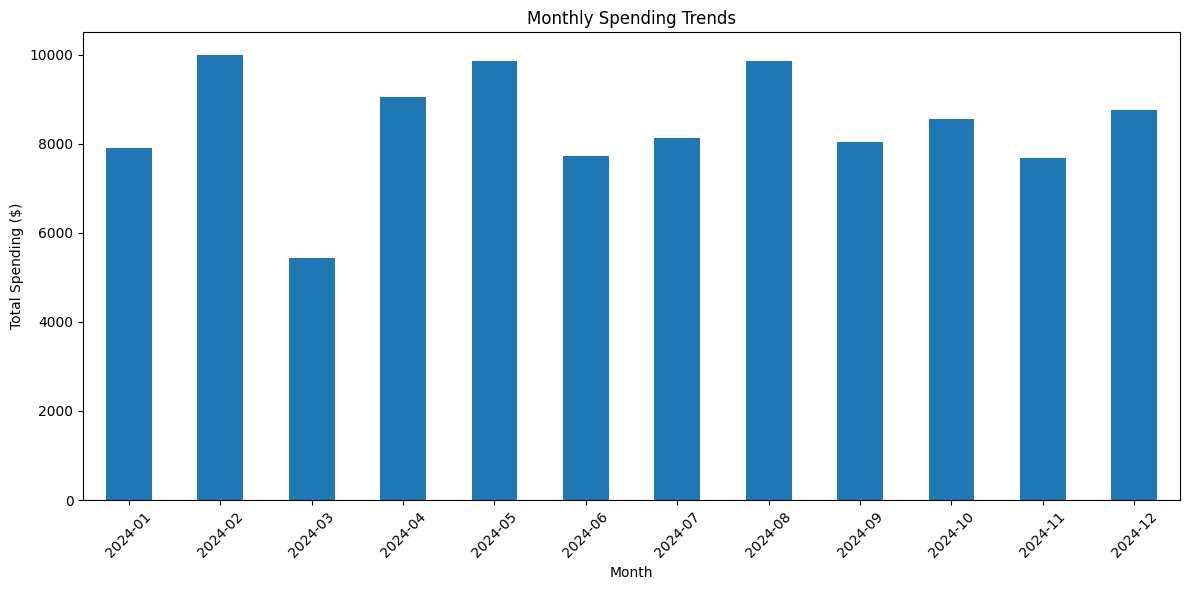

In [13]:
def create_visualizations(df):
    # Pie chart for category distribution
    plt.figure(figsize=(10, 6))
    category_sums = df.groupby('category')['amount'].sum()
    plt.pie(category_sums, labels=category_sums.index, autopct='%1.1f%%')
    plt.title('Expense Distribution by Category')
    plt.show()
    plt.close()
    
    # Bar chart for monthly spending
    df['month'] = df['date'].dt.to_period('M')
    monthly_spending = df.groupby('month')['amount'].sum()
    
    plt.figure(figsize=(12, 6))
    monthly_spending.plot(kind='bar')
    plt.title('Monthly Spending Trends')
    plt.xlabel('Month')
    plt.ylabel('Total Spending ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()

# Generate visualizations
create_visualizations(df)

## Test Model Prediction

Test the model by predicting the category for a new transaction.

In [14]:
# Example: Predict category for new transaction
new_transaction = ["Coffee shop purchase"]
predicted_category = model.predict(new_transaction)[0]
print(f"Predicted category for '{new_transaction[0]}': {predicted_category}")

Predicted category for 'Coffee shop purchase': Entertainment
